## EDA
Working with filtered images and filtered annotations

In [2]:
annotations = "filtered_images/annotations/instances_filtered.json"

### Explore the annotations

In [3]:
## read json file
import json
from collections import defaultdict

with open(annotations, 'r') as file:
    data = json.load(file)

print("top level keys", data.keys())

top level keys dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])


In [42]:

print("Top level keys:", data.keys())

annotations = data['annotations']
print(f"'annotations' contains {len(annotations)} entries")

if len(annotations) > 0:
    first_annotation = annotations[0]
    print("First annotation keys and values:")
    for key, value in first_annotation.items():
        print(f"  {key}: {value}")
else:
    print("'annotations' is empty")


Top level keys: dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
'annotations' contains 235 entries
First annotation keys and values:
  segmentation: [[27.72, 178.68, 17.56, 184.7, 17.56, 190.34, 49.17, 193.86, 53.06, 189.97, 53.19, 184.7, 44.91, 182.31, 41.02, 180.56, 38.63, 177.55, 32.11, 177.17, 30.48, 178.93, 29.85, 178.93]]
  area: 403.87925000000035
  iscrowd: 0
  image_id: 557067
  bbox: [17.56, 177.17, 35.63, 16.69]
  category_id: 73
  id: 2227525


#### Explore images

In [8]:
print(f"\nNumber of images:{len(data['images'])}")
print(f"Sample image entry: {data['images'][0]}")


Number of images:119
Sample image entry: {'license': 3, 'file_name': '000000557067.jpg', 'coco_url': 'http://images.cocodataset.org/train2017/000000557067.jpg', 'height': 374, 'width': 500, 'date_captured': '2013-11-20 22:41:15', 'flickr_url': 'http://farm4.staticflickr.com/3381/3421303403_3dc5bb0d39_z.jpg', 'id': 557067}


#### Explore categories

In [13]:
print(f"\nNumber of categories:{len(data['categories'])}")
print("Categories:", [category['name'] for category in data['categories']])


Number of categories:5
Categories: ['tv', 'laptop', 'mouse', 'keyboard', 'cell phone']


#### Explore annotations

In [16]:
print(f"\nNumber of annotations:{len(data['annotations'])}")
print(f"Sample annotation entry: {data['annotations'][0]}")


Number of annotations:235
Sample annotation entry: {'segmentation': [[27.72, 178.68, 17.56, 184.7, 17.56, 190.34, 49.17, 193.86, 53.06, 189.97, 53.19, 184.7, 44.91, 182.31, 41.02, 180.56, 38.63, 177.55, 32.11, 177.17, 30.48, 178.93, 29.85, 178.93]], 'area': 403.87925000000035, 'iscrowd': 0, 'image_id': 557067, 'bbox': [17.56, 177.17, 35.63, 16.69], 'category_id': 73, 'id': 2227525}


#### Image counts per category

In [17]:
category_image_count = defaultdict(int)

In [21]:
# convierto id to name para que sean las keys del dict
category_id_to_name = {cat['id']:cat['name'] for cat in data['categories']}
category_id_to_name

{72: 'tv', 73: 'laptop', 74: 'mouse', 76: 'keyboard', 77: 'cell phone'}

In [28]:
# Count the number of images per category
for annotation in data['annotations']:
    category_image_count[category_id_to_name[annotation['category_id']]] +=1

print("\nImage count per category:")
for category, count in category_image_count.items():
    print(f"{category}: {count} images")


Image count per category:
laptop: 153 images
tv: 180 images
cell phone: 144 images
keyboard: 126 images
mouse: 102 images


### Visualization

In [21]:
import matplotlib.pyplot as plt
import cv2 as cv
import random
import os

In [32]:
images_path = "./filtered_images/images/"

In [35]:
def show_any_image():
    img = cv.imread(images_path + random.choice(os.listdir(images_path)))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    plt.imshow(img)

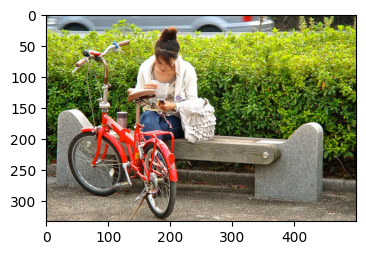

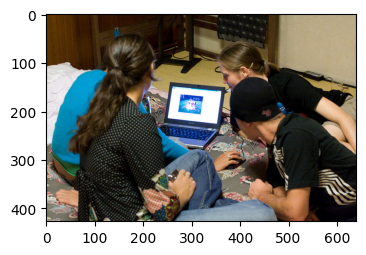

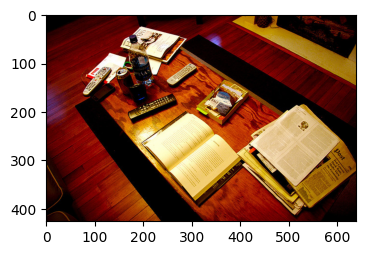

In [36]:
for i in range(3):
    plt.figure(figsize=(4,4))
    show_any_image()

### Visualizacion con bounding boxes

In [37]:
def show_random_image_with_bbox(images_path, annotations_data, num_images=1):
    image_files = os.listdir(images_path)

    for _ in range(num_images):
        random_image = random.choice(image_files)
        image_id = int(random_image.split('.')[0].split('_')[-1])  # Extract the image ID from filename

        img_path = os.path.join(images_path, random_image)
        img = cv.imread(img_path)

        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

        # Find the annotations for the current image
        annotations = [ann for ann in annotations_data['annotations'] if ann['image_id'] == image_id]

        for ann in annotations:
            bbox = ann['bbox']  # Bounding box format: [x_min, y_min, width, height]
            x_min, y_min, width, height = bbox
            x_max = x_min + width
            y_max = y_min + height

            img = cv.rectangle(img, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (255, 0, 0), 2)

        plt.imshow(img)
        plt.axis('off')
        plt.show()


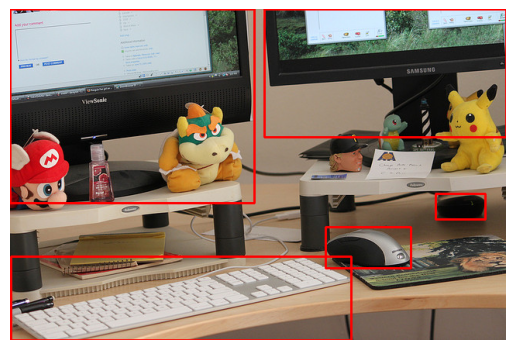

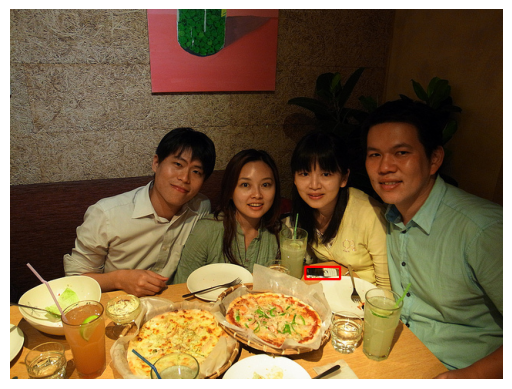

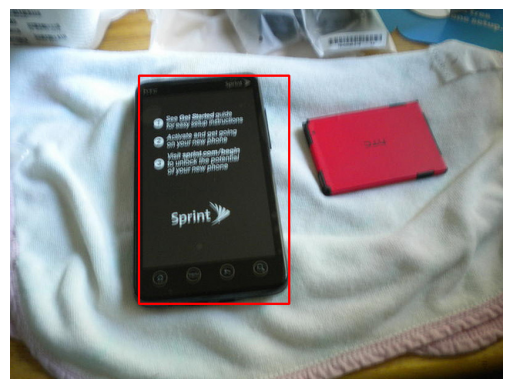

In [41]:
annotations_file = 'filtered_images/annotations/instances_filtered.json'

with open(annotations_file) as f:
    annotations_data = json.load(f)

show_random_image_with_bbox(images_path, annotations_data, num_images=3)

## EDA

height width
bounding boxes, sizes, aspect ratio
distribution of categories
annotations per image

#### Distribution of categories

In [51]:
def plot_category_distribution(annotations_data):
    categories = {category['id']: category['name'] for category in annotations_data['categories']}

    category_counts = defaultdict(int)

    for annotation in annotations_data['annotations']:
        category_id = annotation['category_id']
        category_counts[category_id] += 1

    category_names = [categories[cat_id] for cat_id in category_counts.keys()]
    category_frequencies = [category_counts[cat_id] for cat_id in category_counts.keys()]

    plt.figure(figsize=(4, 4))
    plt.pie(category_frequencies, labels=category_names, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.title('Category Distribution')
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

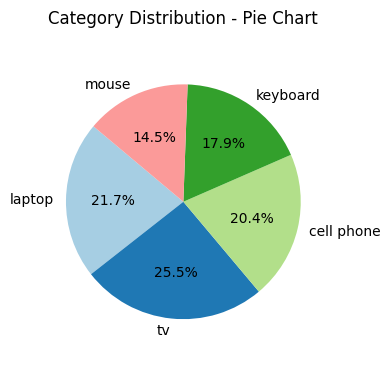

In [50]:
plot_category_distribution(data)

#### Distribution of area

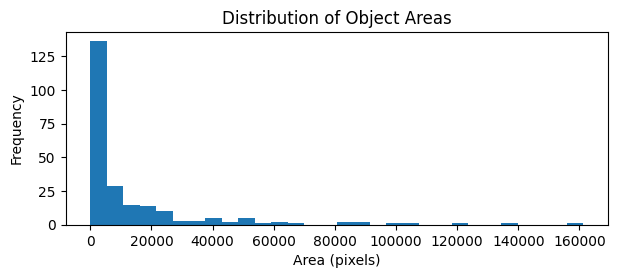

In [89]:
areas = [annotation['area'] for annotation in data['annotations']]
plt.figure(figsize=(7,2.5))
plt.hist(areas, bins=30)
plt.title("Distribution of Object Areas")
plt.xlabel("Area (pixels)")
plt.ylabel("Frequency")
plt.show()

#### Annotations per image

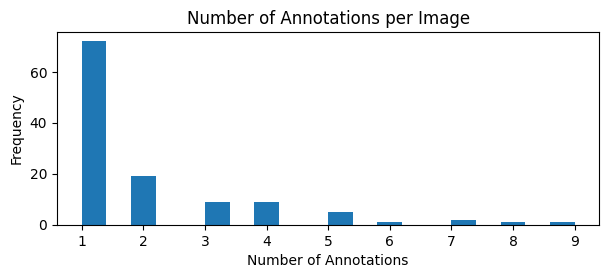

In [93]:
image_annotation_count = defaultdict(int)
for annotation in data['annotations']:
    image_annotation_count[annotation['image_id']] += 1

plt.figure(figsize=(7,2.5))
plt.hist(image_annotation_count.values(), bins=20)
plt.title("Number of Annotations per Image")
plt.xlabel("Number of Annotations")
plt.ylabel("Frequency")
plt.show()

#### Distribution of image sizes

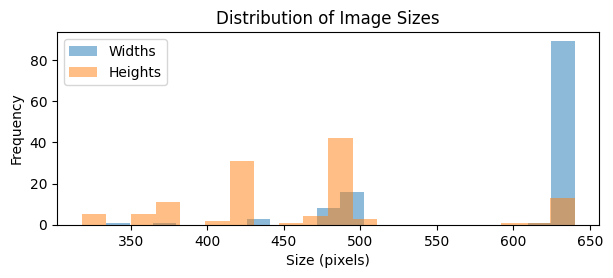

In [94]:
image_sizes = [(img['width'], img['height']) for img in data['images']]
widths, heights = zip(*image_sizes)

plt.figure(figsize=(7, 2.5))
plt.hist(widths, bins=20, alpha=0.5, label='Widths')
plt.hist(heights, bins=20, alpha=0.5, label='Heights')
plt.title("Distribution of Image Sizes")
plt.xlabel("Size (pixels)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

* La mayoria de las imagenes tiene una sola anotacion, es decir una sola categoria detectada.
* La mayoria de los objetos  tienen un area de aprox 5000 pixeles
* La mayoria de las imagenes tienen un ancho de entre 600-650 pixeles

#### Co-ocurrence of categories

In [90]:
import itertools

# track category co-occurrences per image
image_categories = defaultdict(set)
for annotation in data['annotations']:
    image_categories[annotation['image_id']].add(annotation['category_id'])

# count co-occurrences
co_occurrences = defaultdict(int)
for categories in image_categories.values():
    for pair in itertools.combinations(categories, 2):
        co_occurrences[pair] += 1

# display top 10 co-occurrences
sorted_co_occurrences = sorted(co_occurrences.items(), key=lambda x: -x[1])[:10]
for pair, count in sorted_co_occurrences:
    print(f"Categories {category_id_to_name[pair[0]]} and {category_id_to_name[pair[1]]} co-occur {count} times.")

Categories laptop and mouse co-occur 21 times.
Categories tv and keyboard co-occur 18 times.
Categories mouse and keyboard co-occur 18 times.
Categories laptop and keyboard co-occur 16 times.
Categories tv and mouse co-occur 13 times.
Categories laptop and cell phone co-occur 12 times.
Categories tv and laptop co-occur 11 times.
Categories keyboard and cell phone co-occur 8 times.
Categories mouse and cell phone co-occur 8 times.
Categories tv and cell phone co-occur 6 times.
